### Author: *May*

# BUSINESS UNDERSTANDING

## Context and Business Problem

Retirement income adequacy remains a significant and growing concern in Kenya as life expectancy increases and traditional family-based support systems continue to weaken. Pension schemes are intended to provide financial security after retirement, yet evidence from industry reports and empirical studies suggests that a large proportion of pension scheme members retire with insufficient income to maintain a reasonable standard of living.

Industry benchmarks recommend a **replacement ratio of 60–80%** of a member’s final salary to achieve adequate retirement income. However, studies show that **only about 13% of defined contribution (DC) schemes** and **approximately 6% of defined benefit (DB) schemes** in Kenya deliver replacement ratios considered adequate for members joining at age 25. This indicates that the majority of scheme members face a high risk of income inadequacy in retirement unless they make additional voluntary savings.

At the system level, Kenya’s pension sector has experienced substantial asset growth. Pension assets exceeded **KSh 2.25 trillion by December 2024** and rose further to **over KSh 2.53 trillion by mid-2025**, largely driven by reforms such as the implementation of the **NSSF Act, 2013**. Despite this growth, the pension sector’s **asset-to-GDP ratio remains relatively low at approximately 14–15%**, compared to more mature pension systems. This suggests that asset growth has not translated into uniformly adequate retirement outcomes at the individual member level.

A critical challenge lies in the unequal retirement outcomes observed across salary scales. Evidence from the literature and data indicates that lower-income earners often achieve **higher replacement ratios** due to compulsory contribution mechanisms, while higher-income earners—despite contributing larger absolute amounts—experience **lower proportional income replacement** as contribution rates decline relative to income. Historical contribution rates of **15% (2004–2014)** and the current **18% rate** have been shown to be **inadequate**, particularly under early retirement scenarios.

These disparities are typically not visible during active employment but become evident at retirement, when corrective actions are no longer possible. For pension trustees, employers, and regulators, this creates a pressing need for data-driven tools to identify at-risk members early and to support timely policy and scheme design interventions.

## Business Objectives

- **Assess retirement income adequacy:** Measure and compare replacement ratios across salary bands.
- **Analyze contribution behavior:** Examine how employee and employer contribution rates and contribution amounts vary with income.
- **Identify at-risk groups:** Detect salary levels and member profiles associated with low projected replacement ratios.
- **Understand key drivers:** Determine which factors most strongly influence retirement income outcomes.
- **Support evidence-based decision-making:** Inform contribution rate reviews, scheme design improvements, and member education initiatives.

## Stakeholders

- **Pension Scheme Trustees:** Evaluate whether schemes deliver adequate and equitable retirement outcomes.
- **Fund Managers and Administrators:** Identify contribution gaps and members at risk of inadequate retirement income.
- **Employers:** Assess the effectiveness of existing contribution arrangements and consider enhancements.
- **Regulators (Retirement Benefits Authority):** Monitor pension adequacy and assess the impact of regulatory reforms.
- **Policymakers:** Inform national pension policy and long-term retirement income sustainability strategies.
- **Scheme Members:** Benefit indirectly from improved scheme design and clearer communication on retirement readiness.

## Success Metrics

- **Replacement ratio outcomes:** Proportion of members achieving recommended adequacy benchmarks (60–80%).
- **Contribution adequacy:** Consistency and sufficiency of contribution rates across salary scales.
- **Model performance metrics:** Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared for replacement ratio predictions.
- **Feature importance:** Stability and interpretability of key drivers such as contribution rates and years of service.
- **Business relevance:** Ability to clearly identify salary groups most exposed to inadequate retirement income.

# DATA UNDERSTANDING

This study uses member-level pension data to analyze contribution behavior and retirement income adequacy across salary scales among pension scheme members in Kenya. The dataset represents anonymized administrative records drawn from multiple pension schemes and captures key demographic, employment, and contribution-related attributes relevant to retirement outcomes.

## Data Source

The dataset consists of **2,561 observations**, where each row represents an individual pension scheme member. The data includes information on members’ earnings, contribution rates, accumulated pension savings, and employment tenure. All personal identifiers have been removed to ensure confidentiality and ethical use of the data.

The data is suitable for analyzing pension adequacy because it captures the primary determinants of retirement outcomes under defined contribution (DC) pension arrangements.

## Key Variables

The dataset contains the following core variables:

- **Salary:** The member’s current or final basic salary, used as a proxy for pre-retirement earnings.
- **Age:** The current age of the member.
- **Retirement Age:** The assumed or expected retirement age for the member.
- **Years:** The total number of years to retirement.
- **Employee Contribution Rate (EE):** Percentage of salary contributed by the employee.
- **Employer Contribution Rate (ER):** Percentage of salary contributed by the employer.
- **DOB:** Date Of Birth. 
- **Contributions:** annual contributions based on the EE and ER rates.
- **Fund Value:** current accumulation from monthly contributions as at 31st December 2025. Say what one has in their savings account as at the date specified.

From these variables, additional analytical features are derived, including **projected retirement income** and **replacement ratios**, which form the core outcome measures of this study.

## Target Variable

The primary outcome of interest is the **replacement ratio**, defined as the proportion of a member’s pre-retirement salary that is expected to be replaced by pension income during retirement.

Since actual pension payouts are not observed in the data, replacement ratios are **projected** by converting accumulated fund values into estimated annual retirement income using standard annuitization assumptions. These assumptions are applied consistently across all members to enable fair comparison across salary groups.

However, the data does not capture investment performance history, annuity pricing variation, or post-retirement behavior. As a result, findings are interpreted as **projected retirement outcomes under standardized assumptions**, rather than realized pension income.

These limitations are explicitly acknowledged and addressed in the interpretation of results.

In [180]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Mathematical Operations
import math

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning - Preprocessing
from sklearn.preprocessing import (StandardScaler)

# Machine Learning - Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Machine Learning Models
# Install pygam
!pip install pygam
from pygam import LinearGAM, s
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display  


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Now to load the data and print it out.

In [181]:
# Load data
data = pd.read_csv('../Data/Research data- Raw.csv')
data

,No.,DOB,Age,Fund Value,Salary,Contributions,EE,ER,Years,Retirement age
0,1,3/25/1975,51.0,"12,621,655.25","421,820.00","84,364.00",10%,10%,9.0,60.0
1,2,2/23/1981,45.0,"8,149,961.01","465,010.00","93,002.00",10%,10%,15.0,60.0
2,3,7/24/1991,35.0,"7,085,348.52","504,660.00","100,932.00",10%,10%,25.0,60.0
3,4,4/13/1986,40.0,"6,028,192.05","504,660.00","100,932.00",10%,10%,20.0,60.0
4,5,11/14/1980,46.0,"9,458,131.00","504,660.00","100,932.00",10%,10%,14.0,60.0
...,...,...,...,...,...,...,...,...,...,...
2556,2557,1/1/1980,46.0,"140,829.12","61,215.00","6,121.50",5%,5%,-46.0,NaN
2557,2558,1/1/1980,46.0,"169,616.84","69,120.40","6,912.04",5%,5%,-46.0,NaN
2558,2559,1/1/1980,46.0,"114,402.78","52,618.00","5,261.80",5%,5%,-46.0,NaN
2559,2560,1/1/1980,46.0,"475,380.00","378,000.00","37,800.00",5%,5%,-46.0,NaN


##### *Observation:*

The data is consistent from top to bottom.

The No. column offers very little analytical values and will thus be dropped. Additionally, since there exist an age column, the DOB column is redundant. This too will be dropped.

Next, we will carry out a quick Initial Data Exploration (IDE) to get a bird’s-eye view of the dataset - just as you would form first impressions when greeting someone new.

In [182]:
# Drop No. column and DOB column
data = data.drop(columns=['No.', 'DOB'])

In [183]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*40)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*40)
print("Metadata Check:\n")
display(data.info())

# Descriptive statistics
print('\n'+'--'*40)
print("Descriptive Statistics For Numeric Variables:")
display(data.describe().T)

# Categorical Variables
print('\n'+'--'*40)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

# Check number of unique values in each column
print('\n'+'--'*40)
print("Unique values:")
display(data.nunique())

# Check and remove duplicates
print('\n'+'--'*40)
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*40)
missing = (
    data
    .isnull()
    .sum()
    .to_frame("Missing Values")
    .assign(Percentage=lambda x: (x["Missing Values"] / len(data)) * 100)
    .sort_values("Missing Values", ascending=False)
)

print("Missing values summary:\n")
print(missing[missing["Missing Values"] > 0])

The dataset has 2561 rows and 8 columns.

--------------------------------------------------------------------------------
Columns:


Index(['Age', ' Fund Value ', ' Salary ', ' Contributions ', 'EE', ' ER ',
       ' Years ', 'Retirement age'],
      dtype='object')


--------------------------------------------------------------------------------
Metadata Check:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2561 non-null   float64
 1    Fund Value      2561 non-null   object 
 2    Salary          2560 non-null   object 
 3    Contributions   2560 non-null   object 
 4   EE               2561 non-null   object 
 5    ER              2561 non-null   object 
 6    Years           2561 non-null   float64
 7   Retirement age   1498 non-null   float64
dtypes: float64(3), object(5)
memory usage: 160.2+ KB


None


--------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
Age,2561.0,42.317454,6.540048,24.0,37.0,45.0,46.0,59.0
Years,2561.0,-7.221788,29.215819,-50.0,-45.0,10.0,18.0,34.0
Retirement age,1498.0,60.000000,0.000000,60.0,60.0,60.0,60.0,60.0



--------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
Fund Value,2561,2038,"777,079.24",86
Salary,2560,456,"32,054.60",172
Contributions,2560,456,"3,205.46",172
EE,2561,4,5%,1443
ER,2561,4,5%,1253



--------------------------------------------------------------------------------
Unique values:


Age                  35
 Fund Value        2038
 Salary             456
 Contributions      456
EE                    4
 ER                   4
 Years               59
Retirement age        1
dtype: int64


--------------------------------------------------------------------------------
Duplicates: 284

--------------------------------------------------------------------------------
Missing values summary:

                 Missing Values  Percentage
Retirement age             1063   41.507224
 Contributions                1    0.039047
 Salary                       1    0.039047


#### *Observation:*

- Dataset Size and Structure  
  - 2,561 rows and 10 columns.  
  - Columns include demographic, employment, and pension-related attributes.  

- Column Types and Data Quality  
  - Numeric columns: No. (int64), Age, Years, Retirement age (float64).  
  - Object columns: DOB, Fund Value, Salary, Contributions, EE, ER.  
  - Missing values:  
    - Salary and Contributions: 1 missing value each.  
    - Retirement age: 1,063 missing values.  
  - Issues:  
    - Columns like Fund Value, Salary, Contributions, EE, ER are stored as objects. They require type conversion.  
    - Years contains negative values (down to -50), which may indicate data entry errors or special encoding??  

- Descriptive Statistics:
  - Numeric Columns: 
    - Age: 24–59 years, mean 42.3.  
    - Years: mean -7.22, std 29.21, minimum -50, maximum 34 (data anomalies present).  
    - Retirement age: consistently 60 for all non-missing entries.  

  - Categorical Columns:  
    - DOB: 1,542 unique values (multiple members share birthdates).  
    - Fund Value: 2,038 unique values, most frequent 777,079.24.  
    - Salary & Contributions: 456 unique values each; most frequent 32,054.60 and 3,205.46 respectively.  
    - EE & ER: 4 unique values each; most frequent 5%.  

- Takeaways 
  - Dataset contains a mix of numeric and object-formatted financial data requiring **cleaning and type conversion**.  
  - Missing and negative values need attention before modeling or analysis.  
  - Uniformity in Retirement age indicates either a policy standard or limited variability.


# DATA WRANGLING

We start by standardizing the columns by lowercasing them and removing leading and trailing whitespaces then do type conversion. This is to ensure the data is consistent.

In [184]:
# Standardize column names
data.columns = (
    data.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_') 
      .str.replace(r'[^\w]', '', regex=True)
)

# Rename Years to years_to_retirement
data = data.rename(columns={'years': 'years_to_retirement'})

display(data.columns)

# ---------- [Type conversions] ----------

# Convert monetary columns
money_cols = ['fund_value', 'salary', 'contributions']

for col in money_cols:
    data[col] = (
        data[col]
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# Convert percentage columns
percent_cols = ['ee', 'er']

for col in percent_cols:
    data[col] = (
        data[col]
        .str.replace('%', '', regex=False)
        .astype(float)
        / 100
    )

# Ensure numeric columns
numeric_cols = ['age', 'years_to_retirement', 'retirement_age']
data[numeric_cols] = data[numeric_cols].astype(float)

# Sanity check
print('Dataset Preview:')
display(data.head())

print("Metadata Check After Cleaning:\n")
display(data.info())

Index(['age', 'fund_value', 'salary', 'contributions', 'ee', 'er',
       'years_to_retirement', 'retirement_age'],
      dtype='object')

Dataset Preview:


,age,fund_value,salary,contributions,ee,er,years_to_retirement,retirement_age
0,51.0,12621655.25,421820.0,84364.0,0.1,0.1,9.0,60.0
1,45.0,8149961.01,465010.0,93002.0,0.1,0.1,15.0,60.0
2,35.0,7085348.52,504660.0,100932.0,0.1,0.1,25.0,60.0
3,40.0,6028192.05,504660.0,100932.0,0.1,0.1,20.0,60.0
4,46.0,9458131.00,504660.0,100932.0,0.1,0.1,14.0,60.0


Metadata Check After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2561 non-null   float64
 1   fund_value           2561 non-null   float64
 2   salary               2560 non-null   float64
 3   contributions        2560 non-null   float64
 4   ee                   2561 non-null   float64
 5   er                   2561 non-null   float64
 6   years_to_retirement  2561 non-null   float64
 7   retirement_age       1498 non-null   float64
dtypes: float64(8)
memory usage: 160.2 KB


None

Next, we drop duplicated records to maintain dataset uniqueness and integrity.

In [185]:
# Dealing with duplicates.
# Exact duplicate observations were identified and removed to avoid over-representation.
data = data.drop_duplicates().reset_index(drop=True)

# Sanity check after removing duplicates
print("Duplicates after cleaning:", data.duplicated().sum())

Duplicates after cleaning: 0


And lastly, we drop nulls in salary and contributions columns and fill nulls in retirement_age with the median.

In [186]:
# Dealing with nulls
# Drop observations with missing salary or contributions
data = data.dropna(subset=["salary", "contributions"]).reset_index(drop=True)

# Fill missing values in retirement_age with median
median_retirement_age = data["retirement_age"].median()
data["retirement_age"] = data["retirement_age"].fillna(median_retirement_age)

# Sanity check after handling nulls
print("Missing values after cleaning:")
display(data[["salary", "contributions", "retirement_age"]].isnull().sum())

Missing values after cleaning:


salary            0
contributions     0
retirement_age    0
dtype: int64

There existed negative years to retirement. These resulted from nulls in retirement_age. Years to retirement is calculated by getting the difference between retirement_age and age. Thus we recalculate this and replace the negative values with the actual number of years to returement.

In [187]:
# Recalculate years_to_retirement
data['years_to_retirement'] = data['retirement_age'] - data['age']

# Optional: check for any remaining negative values
negative_years = data[data['years_to_retirement'] < 0]
print(f"Number of negative years_to_retirement after recalculation: {len(negative_years)}")

Number of negative years_to_retirement after recalculation: 0


With the data cleaned, we proceed to Exploratory Data Analysis (EDA) in three stages:

- Univariate analysis: explore individual variables.
- Bivariate analysis: examine relationships between pairs of variables.
- Multivariate analysis: analyze interactions among three or more variables.

## FEATURE ENGINEERING

In [188]:
# 1. Replacement Ratio
# Assumptions
r = 0.10  # annual investment return (10%)

# Calculate future fund value at retirement
# FV of current fund value
fv_current = data["fund_value"] * (1 + r) ** data["years_to_retirement"]

# FV of annual contributions (ordinary annuity)
fv_contributions = data["contributions"] * (((1 + r) ** data["years_to_retirement"] - 1) / r)

# Total accumulated fund at retirement
future_fund_value = fv_current + fv_contributions

# Annual retirement income using 12% withdrawal
annual_retirement_income = 0.12 * future_fund_value

# Replacement ratio
data["rr"] = annual_retirement_income / data["salary"]

# 2. Total Contribution Rate
data["total_contribution_rate"] = data["ee"] + data["er"]

# 3. Contribution-to-Salary Ratio
data["contribution_to_salary_ratio"] = (
    data["contributions"] / data["salary"]
)

# 4. Fund Accumulation Efficiency
data["fund_per_year_to_retirement"] = (
    data["fund_value"] / data["years_to_retirement"]
)

# Numerical safety
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.head()

,age,fund_value,salary,contributions,ee,er,years_to_retirement,retirement_age,rr,total_contribution_rate,contribution_to_salary_ratio,fund_per_year_to_retirement
0,51.0,12621655.25,421820.0,84364.0,0.1,0.1,9.0,60.0,8.792420,0.2,0.2,1.402406e+06
1,45.0,8149961.01,465010.0,93002.0,0.1,0.1,15.0,60.0,9.548005,0.2,0.2,5.433307e+05
2,35.0,7085348.52,504660.0,100932.0,0.1,0.1,25.0,60.0,20.614441,0.2,0.2,2.834139e+05
3,40.0,6028192.05,504660.0,100932.0,0.1,0.1,20.0,60.0,11.017844,0.2,0.2,3.014096e+05
4,46.0,9458131.00,504660.0,100932.0,0.1,0.1,14.0,60.0,9.211939,0.2,0.2,6.755808e+05


# EXPLORATORY DATA ANALYSIS (EDA)

## 1. UNIVARIATE ANALYSIS

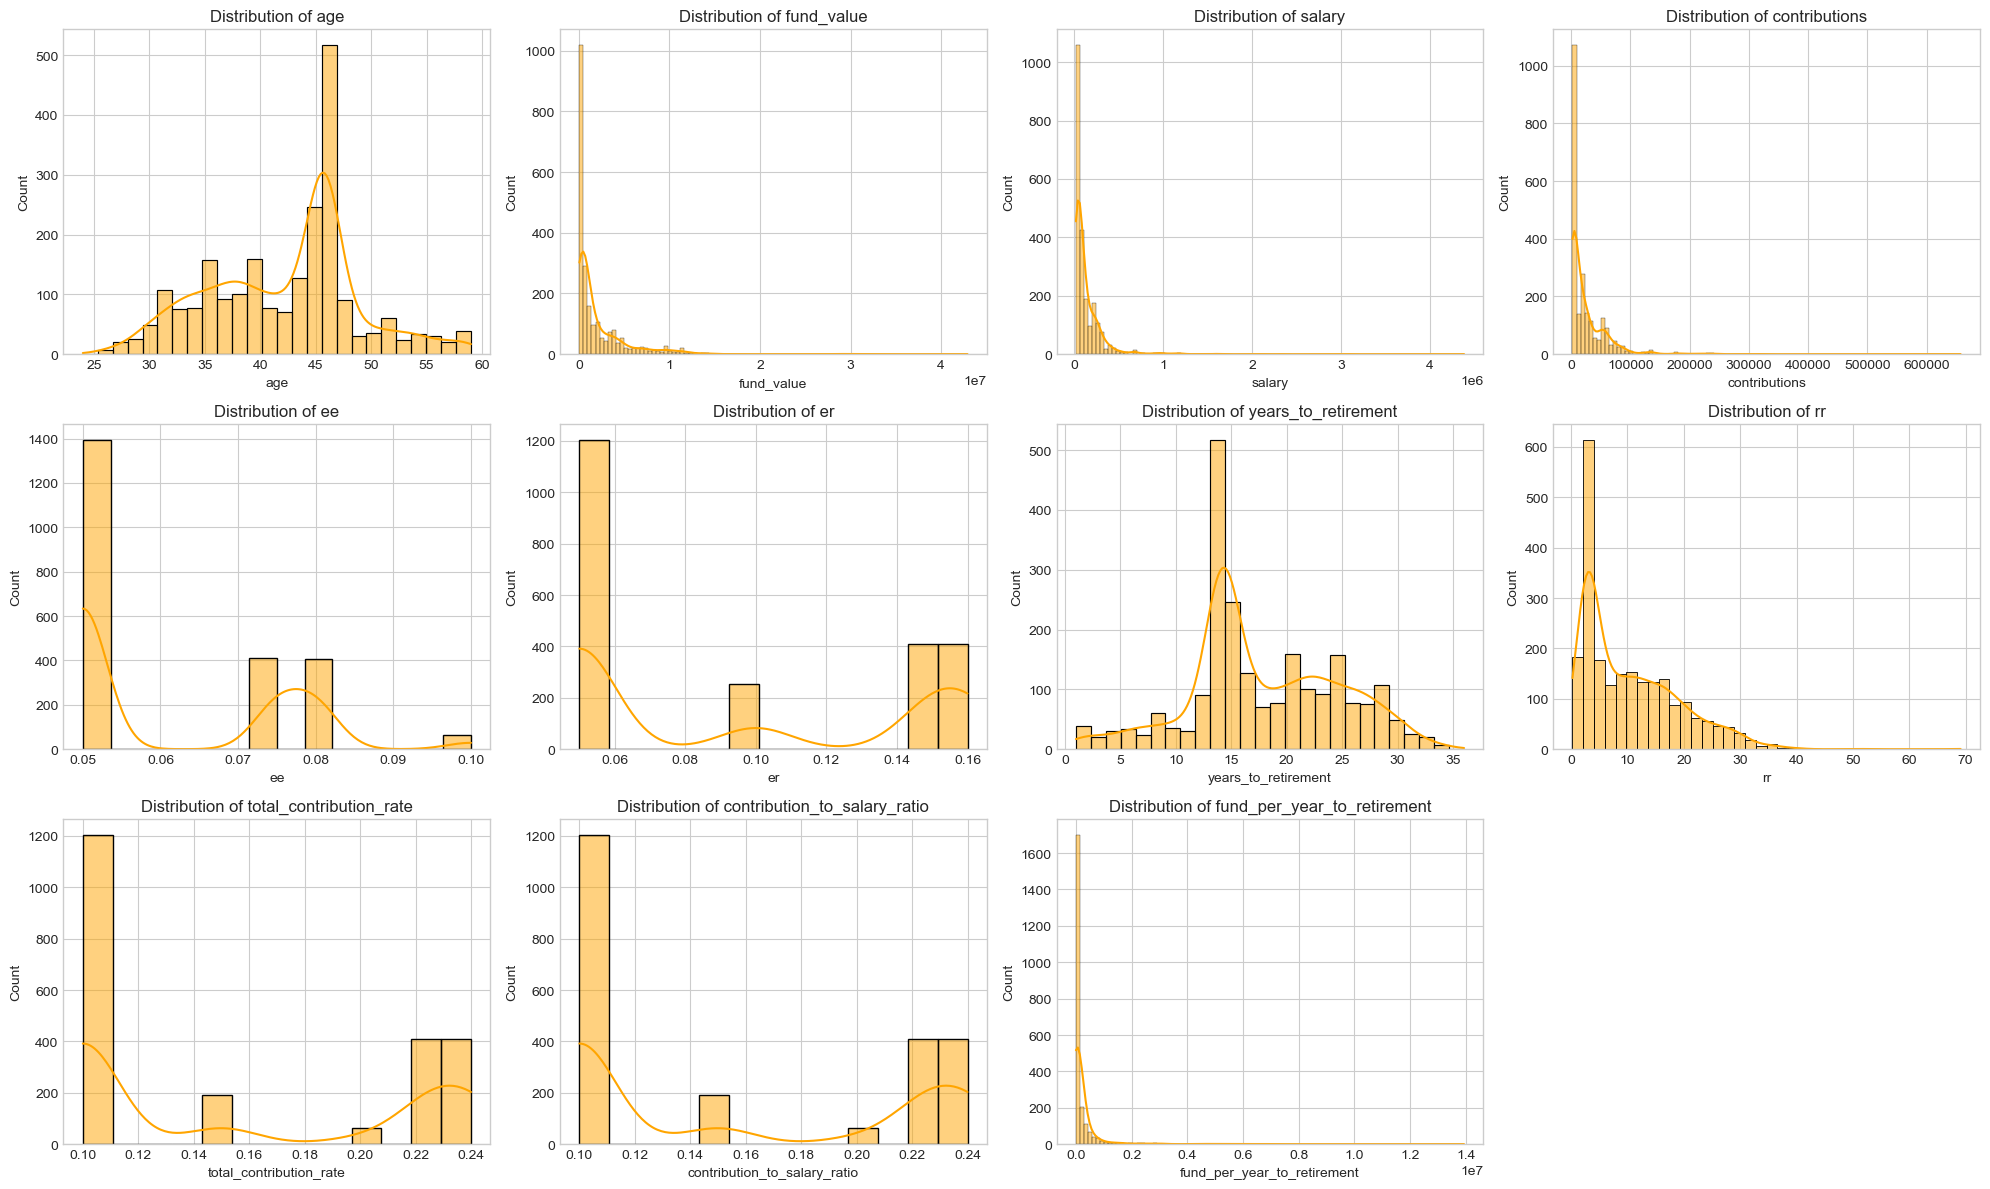

In [189]:
# Columns to plot (exclude 'retirement_age')
numeric_cols = [col for col in data.columns if col != "retirement_age"]

# Determine grid size
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='orange')  
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observation:*

**Age:** The member population is largely concentrated between 35 and 50 years, indicating a predominantly mid-career workforce. This is strategically important because individuals in this phase still have time to adjust contribution behavior, making early identification of inadequacy both possible and actionable for trustees and employers.

**Salary:** The strong positive skew suggests that most members earn relatively modest salaries, while a small proportion are high-income earners. Given existing evidence that higher earners often achieve lower proportional income replacement, this distribution signals a potential structural adequacy risk at the upper end of the salary scale.

**Fund Value:** The heavy right skew indicates substantial inequality in accumulated retirement savings. While a few members appear well-positioned for retirement, the majority hold comparatively smaller balances, which may translate into lower projected pension income unless contribution rates or investment growth improve.

**Contributions:** Contribution amounts follow the same skewed pattern as salary, reinforcing the likelihood that retirement outcomes are strongly income-driven. However, since replacement ratio is a proportional measure, higher absolute contributions do not necessarily guarantee adequacy.

**Employee (EE) and Employer (ER) Contribution Rates:**
The multimodal distributions suggest policy-driven contribution structures, with members clustered around specific rate tiers (e.g., ~5%, ~10%, ~15%). This is a critical governance insight: adequacy challenges may stem less from member behavior and more from scheme design. If commonly adopted contribution rates are below what is actuarially required, systemic inadequacy will persist regardless of salary growth.

**Years to Retirement:** Most members have 10–30 years remaining, providing a meaningful intervention window. From a business perspective, this supports proactive strategies such as contribution escalation, member education, or plan redesign before retirement outcomes become irreversible.

**Replacement Ratio (Target Variable):**
The replacement ratio distribution is strongly right-skewed, with the majority of members clustered at low replacement levels and a rapidly thinning tail toward higher ratios. This indicates that while a small subset of members is on track to replace a substantial portion of pre-retirement income, most are projected to fall short of commonly accepted adequacy thresholds.

Business Interpretation:

The concentration of members below standard adequacy benchmarks (typically 60–80%) suggests a systemic retirement income shortfall rather than isolated underperformance.

The skewed nature of the distribution implies that adequate outcomes are achievable, but only under specific conditions—such as early scheme entry, sustained contribution at higher rates, longer accumulation periods, or favorable salary trajectories.

The presence of high replacement ratio outliers confirms that the scheme design can deliver adequacy, but not consistently across the membership, pointing to unequal benefit realization.

From a governance perspective, replacement ratio emerges as a critical diagnostic metric, linking contribution policy, salary progression, and time-to-retirement into a single, interpretable adequacy outcome. Persistent clustering at low ratios indicates that without structural adjustments—particularly to contribution rates or escalation mechanisms—most members are unlikely to achieve sufficient retirement income.

**Total Contribution Rate & Contribution-to-Salary Ratio:**
These structured distributions further reinforce the conclusion that scheme rules—not random behavior—are shaping retirement outcomes. If adequacy is not being achieved, contribution policy becomes a primary lever for reform.

**Fund per Year to Retirement:** The extreme skew highlights uneven retirement readiness. Some members are accumulating assets at a pace consistent with adequacy, while many appear underfunded relative to their remaining working years.

## 2. BIVARIATE ANALYSIS

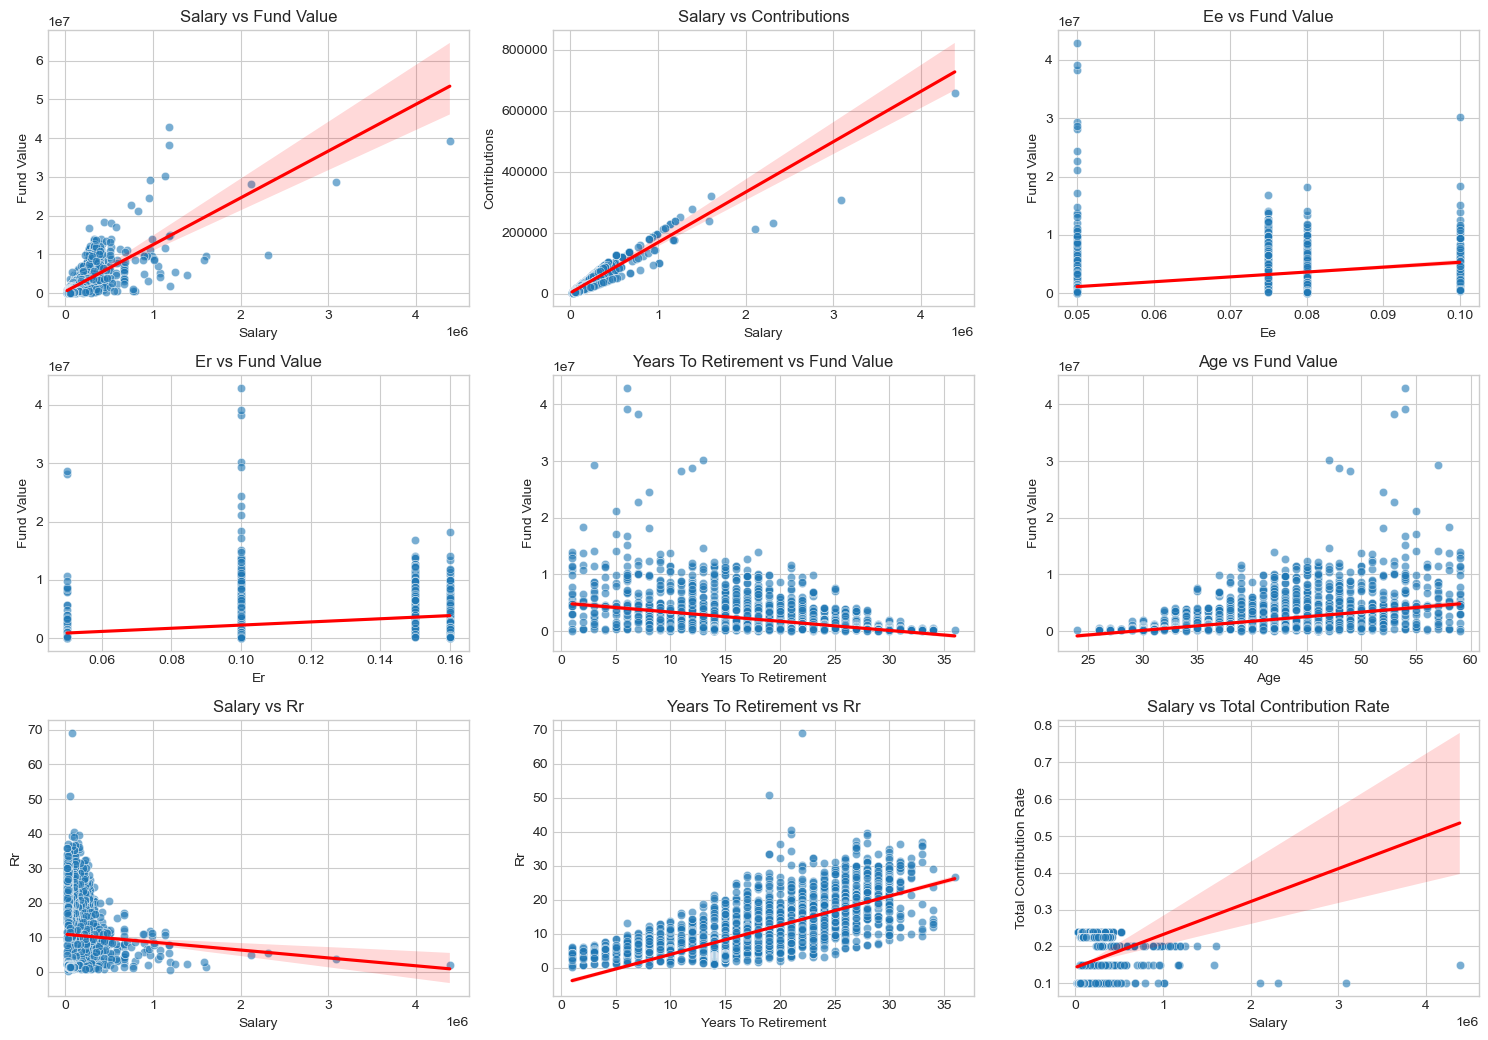

In [190]:
# Bivariate pairs to plot (excluding retirement_age)
bivariate_pairs = [
    ('salary', 'fund_value'),
    ('salary', 'contributions'),
    ('ee', 'fund_value'),
    ('er', 'fund_value'),
    ('years_to_retirement', 'fund_value'),
    ('age', 'fund_value'),
    ('salary', 'rr'),
    ('years_to_retirement', 'rr'),
    ('salary', 'total_contribution_rate')
]

# Determine grid size
n_pairs = len(bivariate_pairs)
n_cols = 3
n_rows = (n_pairs + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3.5*n_rows))
axes = axes.flatten()  # Flatten in case of 2D array

# Loop through pairs and plot
for i, (x_col, y_col) in enumerate(bivariate_pairs):
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6, ax=axes[i])
    sns.regplot(data=data, x=x_col, y=y_col, scatter=False, color='red', ax=axes[i])
    axes[i].set_title(f'{x_col.replace("_"," ").title()} vs {y_col.replace("_"," ").title()}')
    axes[i].set_xlabel(x_col.replace("_"," ").title())
    axes[i].set_ylabel(y_col.replace("_"," ").title())

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observations:*

**Salary vs Fund Value:**  
There is a strong positive relationship between salary and fund value. Higher earners generally accumulate larger retirement balances, reflecting higher absolute contributions over time. However, the wide dispersion at higher salary levels indicates that salary alone does not fully explain accumulation outcomes—tenure, contribution rates, and timing effects play a significant role.

**Salary vs Contributions:**  
A near-linear positive relationship is observed, consistent with contributions being salary-linked. The tight clustering around the fitted line confirms that contribution amounts are largely rule-based rather than discretionary. Deviations at higher salary levels suggest contribution caps or uneven participation among high earners.

**Employee Contribution Rate (EE) vs Fund Value:**  
Fund values vary widely across identical employee contribution rates, indicating that employee contribution rates alone have limited explanatory power for accumulated wealth. This suggests that contribution duration and salary level are more influential than the rate itself.

**Employer Contribution Rate (ER) vs Fund Value:**  
A slightly stronger but still dispersed positive relationship is observed relative to employee contribution rates. Higher employer contribution tiers are associated with higher average fund values, highlighting the importance of employer contribution policy in shaping long-term retirement outcomes.

**Years to Retirement vs Fund Value:**  
A clear negative relationship exists, with members closer to retirement generally exhibiting higher fund values. This reflects cumulative accumulation over time and confirms that duration in the scheme is a dominant driver of fund size. Nevertheless, substantial dispersion at similar horizons points to heterogeneous contribution and salary histories.

**Age vs Fund Value:**  
Fund value increases with age, consistent with lifecycle accumulation. The relationship becomes more dispersed at older ages, indicating unequal accumulation paths even among members with similar ages and retirement proximity.

**Salary vs Replacement Ratio (RR):**  
An inverse relationship is evident, where higher salaries are associated with lower replacement ratios. This indicates that while high earners accumulate larger absolute balances, they tend to replace a smaller proportion of pre-retirement income, reinforcing structural adequacy risks at higher income levels.

**Years to Retirement vs Replacement Ratio (RR):**  
A strong positive relationship is observed. Members with more years remaining to retirement tend to exhibit higher projected replacement ratios, underscoring the importance of early participation and longer accumulation horizons in achieving retirement adequacy.

**Salary vs Total Contribution Rate:**  
Total contribution rates show limited sensitivity to salary and cluster around fixed contribution tiers. This confirms that contribution policy is largely salary-inelastic, implying that higher earners do not automatically contribute a higher proportion of income—an important factor contributing to declining replacement ratios at higher salary levels.

**Overall:**  
The bivariate relationships indicate that retirement outcomes are primarily structurally driven by contribution policy, salary-linked contribution mechanics, and time in the scheme. Replacement ratio outcomes appear more sensitive to contribution design and accumulation horizon than to salary growth alone, supporting their use as key explanatory variables in subsequent modeling.

## 3. MULTIVARIATE ANALYSIS

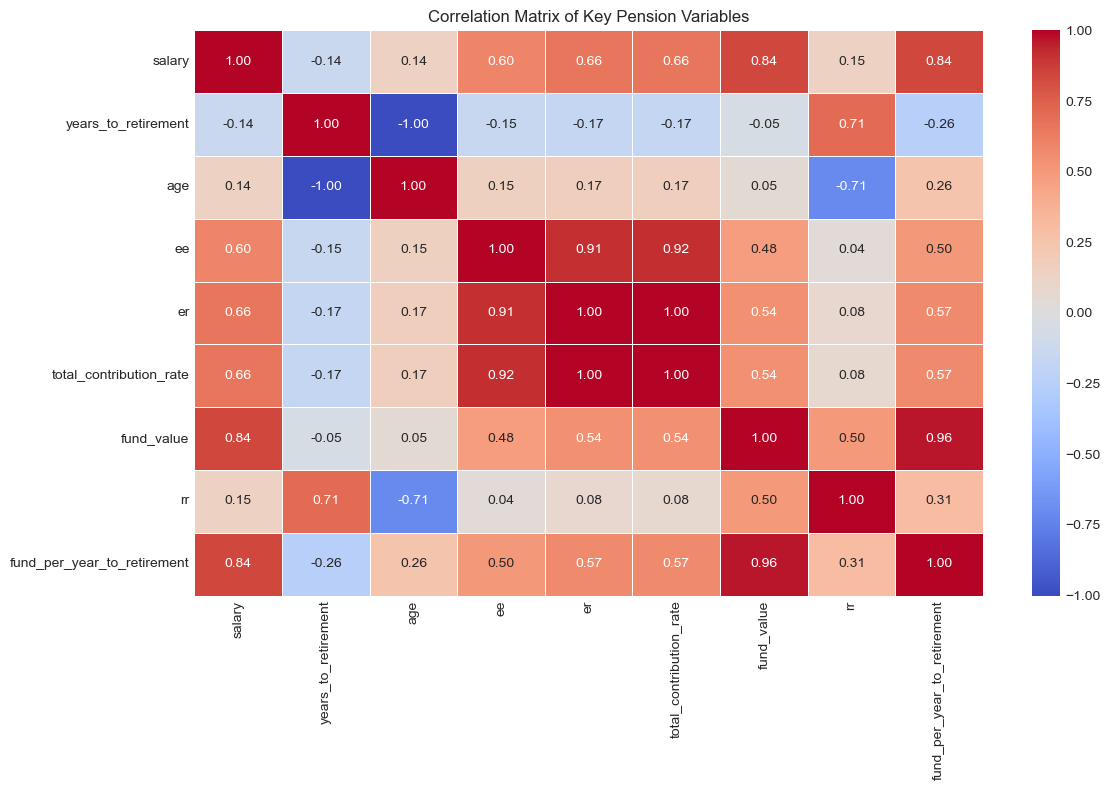

In [191]:
# Build correlation matrix
vars_corr = [
    "salary",
    "years_to_retirement",
    "age",
    "ee",
    "er",
    "total_contribution_rate",
    "fund_value",
    "rr",
    "fund_per_year_to_retirement"
]

corr = data[vars_corr].corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Key Pension Variables")

plt.tight_layout()
plt.show()

#### *Observations:*

Spearman’s rank correlation was used to assess monotonic relationships and provide robustness to non-normality and extreme values observed in earlier distributional analysis.

**Age and Years to Retirement:**  
Age and years to retirement exhibit a near-perfect negative correlation (ρ ≈ −1.00), reflecting their deterministic relationship. As a result, these variables convey overlapping information and should not be included simultaneously in multivariate models without appropriate adjustment.

**Salary Relationships:**  
Salary shows a strong positive correlation with fund value (ρ ≈ 0.84) and fund per year to retirement (ρ ≈ 0.84), confirming salary as a primary driver of absolute wealth accumulation. However, salary has only a weak correlation with replacement ratio (ρ ≈ 0.15), reinforcing earlier evidence that higher earnings do not translate proportionally into higher income replacement.

**Contribution Rates:**  
Employee (EE), employer (ER), and total contribution rates are extremely highly correlated with each other (ρ ≈ 0.91–1.00), indicating that total contribution rate is effectively a composite of EE and ER rates. This strong multicollinearity suggests that only one of these variables should be retained in predictive modeling to avoid redundancy.

**Contribution Rates and Fund Value:**  
Moderate positive correlations exist between contribution rates and fund value (ρ ≈ 0.48–0.54), implying that higher contribution rates support greater accumulation, though their influence is weaker than that of salary.

**Years to Retirement and Replacement Ratio:**  
Replacement ratio exhibits a strong positive correlation with years to retirement (ρ ≈ 0.71) and a strong negative correlation with age (ρ ≈ −0.71). This highlights accumulation horizon as a dominant determinant of adequacy, emphasizing the importance of early participation and sustained contributions.

**Fund Value and Replacement Ratio:**  
Fund value is moderately correlated with replacement ratio (ρ ≈ 0.50), indicating that while higher accumulated balances improve adequacy, fund size alone does not fully explain replacement outcomes.

**Fund per Year to Retirement:**  
This metric is very strongly correlated with fund value (ρ ≈ 0.96), suggesting it captures a time-adjusted version of accumulated wealth. Its moderate correlation with replacement ratio (ρ ≈ 0.31) indicates relevance for adequacy assessment, but also signals overlap with fund value.

**Overall:**  
The correlation structure confirms that retirement adequacy is shaped by a combination of salary, contribution policy, and—most critically—time to retirement. Strong multicollinearity among contribution variables and between age and years to retirement has important modeling implications, necessitating careful feature selection or dimensionality reduction in subsequent analysis.

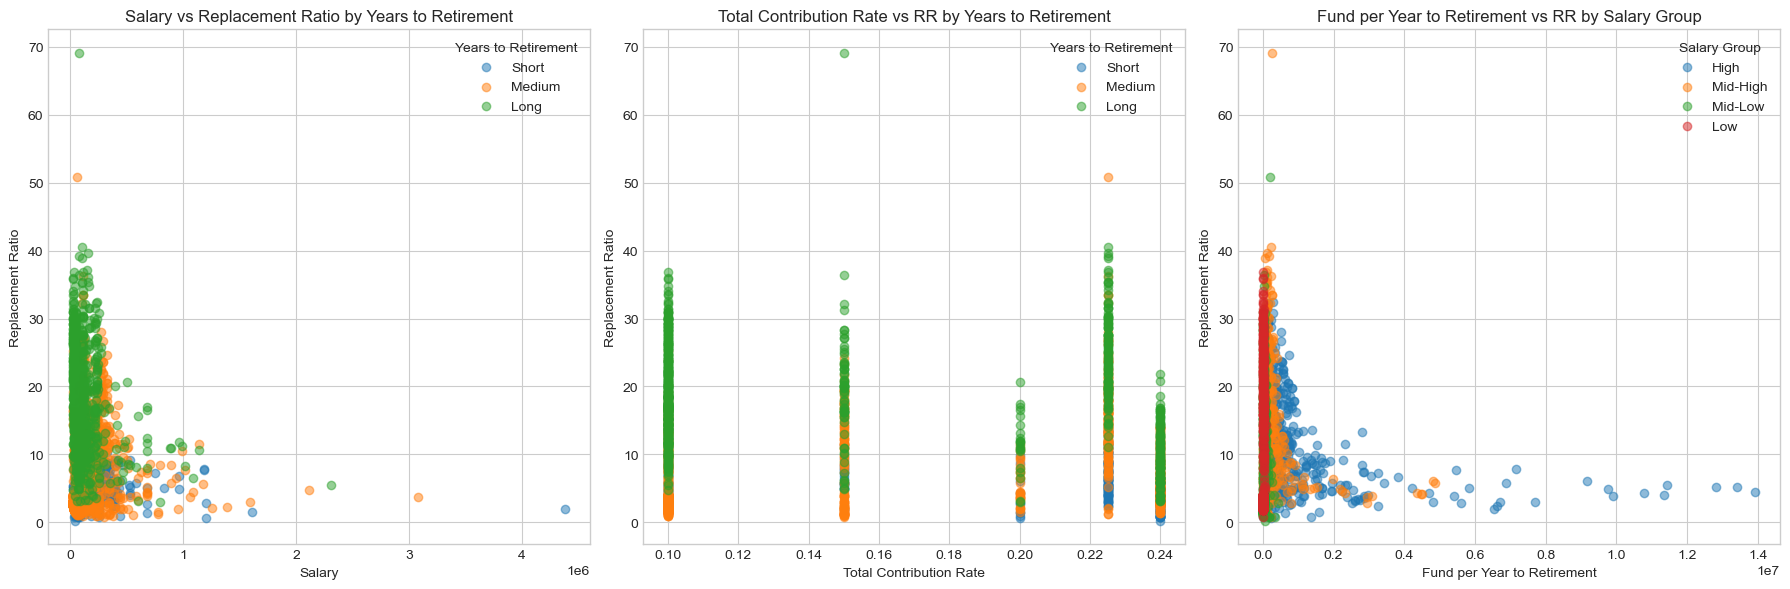

In [192]:
# Create salary and years-to-retirement bins
data["salary_quantile"] = pd.qcut(
    data["salary"], q=4,
    labels=["Low", "Mid-Low", "Mid-High", "High"]
)

data["ytr_band"] = pd.cut(
    data["years_to_retirement"],
    bins=[0, 10, 20, 35],
    labels=["Short", "Medium", "Long"]
)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Salary × Years to Retirement → RR
for band in data["ytr_band"].dropna().unique():
    subset = data[data["ytr_band"] == band]
    axes[0].scatter(
        subset["salary"],
        subset["rr"],
        alpha=0.5,
        label=band
    )

axes[0].set_title("Salary vs Replacement Ratio by Years to Retirement")
axes[0].set_xlabel("Salary")
axes[0].set_ylabel("Replacement Ratio")
axes[0].legend(title="Years to Retirement")

# 2. Total Contribution Rate × Years to Retirement against RR
for band in data["ytr_band"].dropna().unique():
    subset = data[data["ytr_band"] == band]
    axes[1].scatter(
        subset["total_contribution_rate"],
        subset["rr"],
        alpha=0.5,
        label=band
    )

axes[1].set_title("Total Contribution Rate vs RR by Years to Retirement")
axes[1].set_xlabel("Total Contribution Rate")
axes[1].set_ylabel("Replacement Ratio")
axes[1].legend(title="Years to Retirement")

# 3. Fund per Year to Retirement × Salary → RR
for q in data["salary_quantile"].dropna().unique():
    subset = data[data["salary_quantile"] == q]
    axes[2].scatter(
        subset["fund_per_year_to_retirement"],
        subset["rr"],
        alpha=0.5,
        label=q
    )

axes[2].set_title("Fund per Year to Retirement vs RR by Salary Group")
axes[2].set_xlabel("Fund per Year to Retirement")
axes[2].set_ylabel("Replacement Ratio")
axes[2].legend(title="Salary Group")

plt.tight_layout()
plt.show()

#### *Observations:*

##### 1. Salary vs Replacement Ratio by Years to Retirement

- There is **no strong positive relationship** between salary and replacement ratio. Higher salaries do not systematically translate into higher retirement income adequacy.
- Individuals with **longer time to retirement** show greater dispersion and higher potential replacement ratios, suggesting that **time in the scheme is a stronger driver** than salary level.
- High-salary earners often **cluster at lower replacement ratios**, indicating possible under-saving relative to income.
- A few **extreme outliers** (very high salary, very low replacement ratio) suggest pension adequacy risks among top earners.

##### 2. Total Contribution Rate vs Replacement Ratio by Years to Retirement

- Higher total contribution rates (around **22–24%**) are generally associated with **higher replacement ratios**, especially for members far from retirement.
- Members with **short time to retirement** rarely achieve high replacement ratios even at higher contribution rates, indicating that **time constraints dominate**.
- The **long-to-retirement group benefits most** from contribution increases, reinforcing the importance of compounding.

##### 3. Fund per Year to Retirement vs Replacement Ratio by Salary Group

- A **clear inverse relationship** is observed: as fund-per-year-to-retirement increases, replacement ratios tend to **decline**, particularly for high-income groups.
- **Low and mid-low salary groups** achieve relatively higher replacement ratios with smaller funds, implying better proportional adequacy.
- **High-income members** require substantially larger accumulated funds to reach comparable replacement ratios, highlighting structural adequacy challenges.

##### 4. Employee vs Employer Contribution Rate (Colored by Fund Value)

- Employer contribution rates appear **discrete and policy-driven**, rather than continuous.
- Higher fund values are concentrated where **both employee and employer contributions are higher**, indicating a joint effect.
- Employee contribution rates show **limited variation**, suggesting less individual flexibility compared to employer-driven scheme design.

### Overally:

- **Time to retirement and contribution behavior** matter more than salary alone in determining retirement adequacy.
- Higher-income members face a **greater adequacy gap**, despite making larger absolute contributions.
- **Early, sustained contributions**, particularly when matched by employers, are the most reliable path to achieving higher replacement ratios.


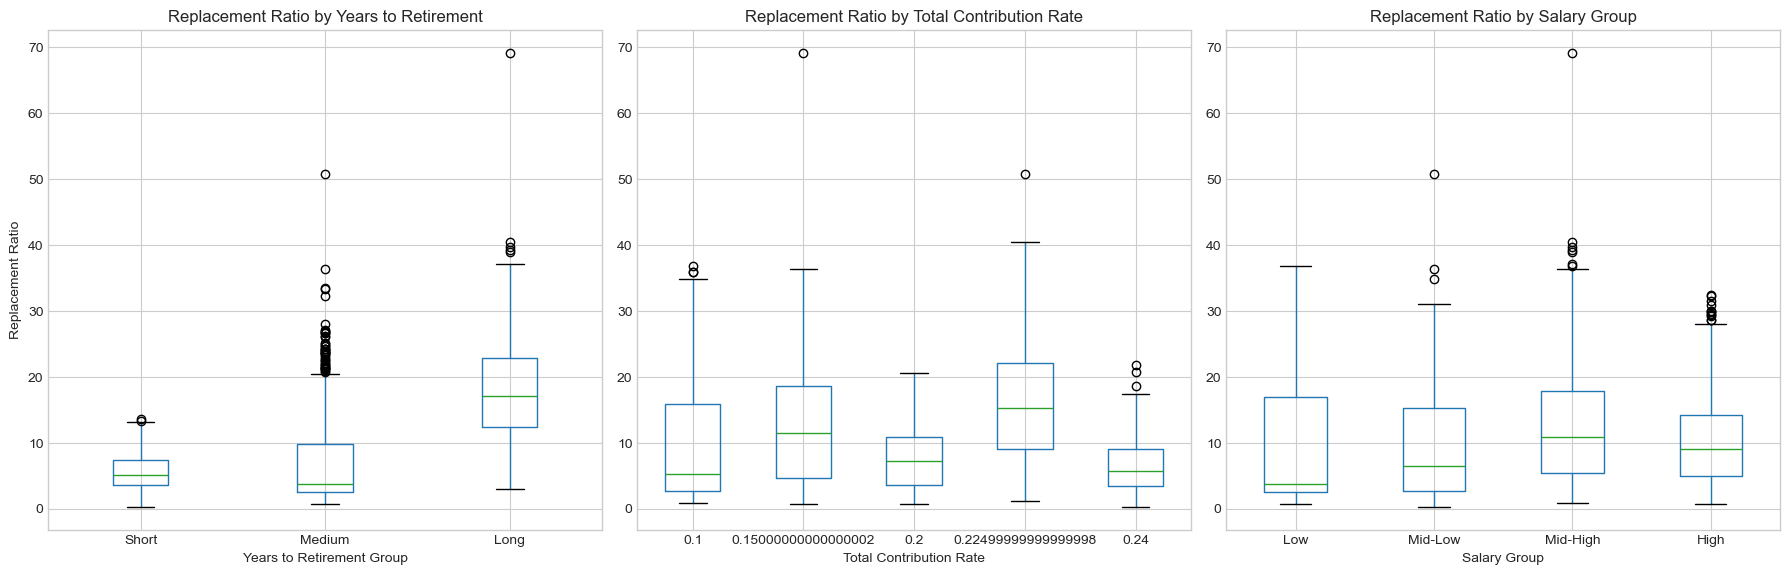

In [193]:
# Make figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Replacement Ratio by Years to Retirement
data.boxplot(column="rr", by="ytr_band", ax=axes[0])
axes[0].set_title("Replacement Ratio by Years to Retirement")
axes[0].set_xlabel("Years to Retirement Group")
axes[0].set_ylabel("Replacement Ratio")

# 2. Replacement Ratio by Total Contribution Rate
data.boxplot(column="rr", by="total_contribution_rate", ax=axes[1])
axes[1].set_title("Replacement Ratio by Total Contribution Rate")
axes[1].set_xlabel("Total Contribution Rate")

# 3. Replacement Ratio by Salary Group
data.boxplot(column="rr", by="salary_quantile", ax=axes[2])
axes[2].set_title("Replacement Ratio by Salary Group")
axes[2].set_xlabel("Salary Group")

plt.suptitle("")
plt.tight_layout()
plt.show()

#### *Observations:*

##### 1. Replacement Ratio by Years to Retirement

- There is a **strong monotonic increase** in median replacement ratio from *Short* → *Medium* → *Long* years to retirement.
- Members with **longer horizons** not only achieve higher medians but also show **greater upside**, with several high outliers.
- The *Short* group is tightly clustered at low replacement ratios, indicating **limited capacity to reach adequacy** regardless of variability.

Therefore: Time to retirement is the most decisive structural determinant of replacement ratio outcomes.

##### 2. Replacement Ratio by Total Contribution Rate

- Median replacement ratios **generally increase with higher contribution rates**, particularly between the lowest and highest rates.
- Higher contribution rates are associated with **wider interquartile ranges**, suggesting greater potential for adequacy but also heterogeneity in outcomes.
- The highest contribution rate shows a **clear upward shift in the entire distribution**, not just among outliers.

Thus: Increasing contribution rates improves retirement adequacy, but the gains are uneven across members.

##### 3. Replacement Ratio by Salary Group

- Replacement ratios **do not increase proportionally with salary**.
- *Mid-High* and *High* salary groups exhibit higher medians, but the difference is **modest relative to income growth**.
- Lower salary groups show **greater dispersion**, with some members achieving relatively high replacement ratios despite lower earnings.

Which means: Higher income alone does not guarantee higher retirement income adequacy; saving intensity and time matter more.

## CONCLUSIONS AND RECOMMENDATIONS

### CONCLUSIONS

This analysis provides strong and consistent evidence that retirement adequacy within the scheme is **structurally determined rather than behaviorally accidental**. Three dominant forces repeatedly emerge: **time to retirement, contribution policy, and salary dynamics**.

1. The membership profile is predominantly **mid-career**, with most members aged between 35 and 50 and having 10–30 years remaining until retirement. This presents a critical opportunity window. While many members are not currently on track to achieve adequate replacement ratios, they still have sufficient time for corrective interventions. The risk, therefore, is not inevitability but **inaction**.

2. Retirement outcomes exhibit **substantial inequality**. Fund values, salaries, contributions, and fund-per-year-to-retirement are all heavily right-skewed, indicating that a small proportion of members are well prepared for retirement while the majority are not. Importantly, this inequality is not random: it reflects cumulative effects of salary level, contribution structure, and length of accumulation.

3. **Replacement ratio outcomes are systematically low** for most members. The strong clustering of replacement ratios below commonly accepted adequacy benchmarks (60–80%) indicates a **systemic shortfall** rather than isolated underperformance. While the scheme is capable of delivering adequate outcomes—as evidenced by high-ratio outliers—it does so inconsistently and only for specific member profiles.

4. Salary plays a **dual and asymmetric role**. Higher salaries strongly drive fund value and absolute wealth accumulation, yet they are weakly and sometimes negatively associated with replacement ratios. High-income members accumulate larger funds but replace a smaller proportion of pre-retirement income, exposing a structural adequacy risk at the upper end of the salary distribution. This reflects salary-inelastic contribution policies and highlights a mismatch between income growth and saving intensity.

5. **Time to retirement is the single most decisive determinant of adequacy**. It shows the strongest monotonic relationship with replacement ratio and dominates salary and contribution effects, especially for members early in their careers. Short-horizon members exhibit little capacity to materially improve outcomes, even at higher contribution rates, while long-horizon members benefit disproportionately from compounding.

6. Contribution behavior is largely **policy-driven**. Employee, employer, and total contribution rates are highly clustered and strongly correlated with one another, confirming that scheme rules—not individual discretion—shape contribution behavior. Moderate correlations between contribution rates and fund value indicate that while higher rates help, they are insufficient on their own without sufficient time.

7. Finally, adequacy depends on how salary, contribution rates, and time combine over the lifecycle. Models or policies that ignore these interactions risk misdiagnosing the true drivers of retirement outcomes.

### RECOMMENDATIONS

Based on these findings, the following recommendations are proposed for trustees, employers, and scheme designers:

#### 1. Prioritise Early Intervention
Given the dominant role of time to retirement, interventions should focus primarily on **early- and mid-career members**. Automatic enrolment escalation, early contribution boosts, and default increases for new entrants will yield substantially higher long-term adequacy than late-stage corrective measures.

#### 2. Review and Reform Contribution Policy
The evidence suggests that current contribution tiers may be **actuarially insufficient** for delivering adequate replacement ratios across the membership. Trustees should reassess default total contribution rates relative to adequacy targets and consider:
- Raising minimum default rates  
- Introducing automatic contribution escalation  
- Differentiating rates by career stage rather than relying on flat tiers  

Without policy reform, systemic inadequacy is likely to persist regardless of salary growth.

#### 3. Address Salary-Inelastic Contribution Design
High-income members face a disproportionate adequacy gap due to contribution rates that do not scale with income. Introducing **progressive or capped-escalation structures**, or targeted voluntary top-up mechanisms for higher earners, could mitigate declining replacement ratios at higher salary levels.

#### 4. Strengthen Employer Contribution Leverage
Employer contribution rates show a stronger association with fund outcomes than employee rates. Employers should be encouraged to:
- Increase matching contributions  
- Offer enhanced employer rates for early-career members  
- Use employer contributions as a strategic retention and wellbeing tool  

Employer policy is a powerful and underutilised lever for improving adequacy.

#### 5. Segment Member Communication and Education
Member engagement strategies should be **segmented by time to retirement and salary**, rather than generic. Communications should clearly illustrate:
- The disproportionate value of early contributions  
- The limited effectiveness of late-stage increases  
- The specific adequacy risks faced by high earners  

Personalised projections using replacement ratio metrics can improve understanding and actionability.

#### 6. Embed Replacement Ratio as a Core Governance Metric
Replacement ratio should be adopted as a **primary monitoring and reporting metric**, rather than relying solely on fund value. It provides a more interpretable and policy-relevant measure of retirement readiness and aligns directly with adequacy objectives.

#### 7. Inform Modeling and Decision Support
For predictive modeling and decision analytics:
- Avoid simultaneous inclusion of highly collinear variables (e.g., age and years to retirement; EE, ER, and total contribution rate).
- Prioritise interaction terms involving time to retirement, contribution rates, and salary.
- Consider non-linear or tree-based approaches to capture lifecycle and policy effects.

Retirement adequacy within the scheme is **achievable but unevenly distributed**. Without deliberate structural adjustments—particularly to contribution policy and early-career accumulation—the majority of members are unlikely to achieve sufficient retirement income. The strongest returns to action lie in **time-sensitive, policy-led interventions**, not in relying on salary growth or individual behaviour alone.

# MODELING

This study adopts a structured regression-based modeling strategy designed to balance **interpretability, statistical rigor, and predictive performance**, while remaining consistent with the empirical patterns identified during exploratory data analysis. Given the pronounced non-linearity, interaction effects, and structural drivers observed in the data, a single model class is insufficient to fully explain retirement adequacy outcomes. A tiered regression framework is therefore employed.

### Modeling Objective

The primary objective is to **model and explain variation in retirement income adequacy**, measured by the **replacement ratio (RR)**. Replacement ratio is treated as a continuous dependent variable, reflecting its policy relevance and ability to capture proportional retirement readiness across the membership. All modeling approaches are therefore framed strictly as **regression problems**.

### Baseline Regression Model

#### Ordinary Least Squares (OLS)

Ordinary Least Squares regression is estimated as a baseline benchmark. OLS provides a transparent reference point and allows for straightforward interpretation of marginal effects of key predictors such as salary, years to retirement, contribution rates, and fund value.

However, given the strong skewness, heteroskedasticity, and interaction effects identified during exploratory analysis, OLS is not expected to fully capture the underlying data-generating process. Its primary role is diagnostic, serving to highlight the limitations of linear specifications and motivate more flexible modeling approaches.

### Transformed and Interaction-Enhanced Regression

To partially address non-linearity and scale effects, alternative specifications incorporating **log-transformations** of salary and fund-related variables are estimated. Interaction terms between salary, contribution rates, and years to retirement are also introduced to reflect lifecycle dynamics and compounding effects.

These models improve fit relative to simple linear regression while retaining interpretability and provide insight into how the impact of income and contribution behavior varies across accumulation horizons.

### Generalized Additive Models (GAMs)

Generalized Additive Models form the core explanatory modeling approach. GAMs allow replacement ratio to be expressed as a sum of smooth, non-linear functions of key predictors, making them well suited to pension data characterized by compounding, threshold effects, and diminishing marginal returns.

Smooth terms are specified for variables such as years to retirement, total contribution rate, salary, and fund value. This framework captures:
- The dominant and non-linear effect of accumulation horizon on adequacy  
- Diminishing marginal effects of salary on replacement ratio  
- Flattening returns to higher contribution rates later in the lifecycle  

GAMs provide a strong balance between explanatory power and interpretability, enabling clear visualization of how each driver affects retirement adequacy.

### Tree-Based Regression Models

#### Random Forest Regression

Random Forest regression is employed to capture complex interaction structures without requiring explicit functional form assumptions. The model is robust to skewed distributions and outliers and is used primarily to validate the relative importance of predictors identified in earlier analysis.

Variable importance measures from Random Forests provide a non-parametric assessment of the drivers of replacement ratio and serve as a robustness check against parametric model findings.

#### Gradient Boosting Regression

Gradient boosting models, primarily XGBoost, are estimated to maximize predictive accuracy. These models efficiently capture non-linearities and high-order interactions and are particularly well suited to structured financial data.

Model interpretability is supported through feature importance and SHAP value analysis, allowing examination of how changes in salary, contribution rates, and time to retirement influence replacement ratio outcomes across the distribution.

### Feature Selection and Multicollinearity Management

Model specifications are informed by correlation analysis and theoretical considerations. Highly collinear variables are not included simultaneously to avoid redundancy and instability. In particular:
- Age and years to retirement are treated as substitutes, with years to retirement retained due to its stronger explanatory power.
- Employee, employer, and total contribution rates are not jointly included; total contribution rate is used as a composite measure.
- Fund value and fund per year to retirement are modeled separately.

This approach ensures parsimonious models while preserving the core structural drivers of retirement adequacy.

### Model Evaluation

Regression model performance is assessed using error-based metrics such as **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)**. Comparative performance across model classes is used to evaluate robustness and consistency of results, rather than relying on a single best-performing specification.

## DATA PREPROCESSING

In [194]:
# Create copy to work on
model_df = data.copy(deep=True)

# Only use the most relevant features for modeling
model_df = model_df[[
    "salary",
    "years_to_retirement",
    "total_contribution_rate",
    "fund_value",
    "rr"
]]

# Separate target from features
X = model_df.drop('rr', axis=1)
y = model_df['rr']

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1820, 4), (1820,), (456, 4), (456,))

To identify which variables may benefit from a log transformation, we calculate skewness for all numeric features and flag those that are heavily skewed. A common rule of thumb is to consider variables with absolute skewness greater than 1 as “highly skewed.”

In [195]:
# Calculate skewness for all numeric features
skewness = model_df.skew().sort_values(ascending=False)

# Threshold for skewness
threshold = 1

# Filter features with high skewness
skewed_vars = skewness[abs(skewness) > threshold]

print("Highly skewed variables:"+"\n")
print(skewed_vars)

Highly skewed variables:

salary        7.864538
fund_value    4.188217
rr            1.046219
dtype: float64


We then log transform these columns and scale features to ensure they are all on the same scale.

In [196]:
# Apply log transform on skewed columns
for col in ["salary", "fund_value"]:
    # Add +1 to avoid log(0)
    x_train[col + "_log"] = np.log1p(x_train[col])
    x_test[col + "_log"] = np.log1p(x_test[col])

# Drop untransformed originals
x_train = x_train.drop(["salary", "fund_value"], axis=1)
x_test = x_test.drop(["salary", "fund_value"], axis=1)

# Scale the fetatures
cols = ['salary_log', 'fund_value_log', 'years_to_retirement', 'total_contribution_rate']

scaler = StandardScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

## OLS REGRESSION ANALYSIS

                            OLS Regression Results                            
Dep. Variable:                     rr   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1251.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:37:15   Log-Likelihood:                -4668.3
No. Observations:                1820   AIC:                             9347.
Df Residuals:                    1815   BIC:                             9374.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Variable,VIF
0,const,1.000000
1,years_to_retirement,1.048090
2,total_contribution_rate,1.704391
3,salary_log,3.820726
4,fund_value_log,3.524449



Residuals and QQ Plot Analysis:


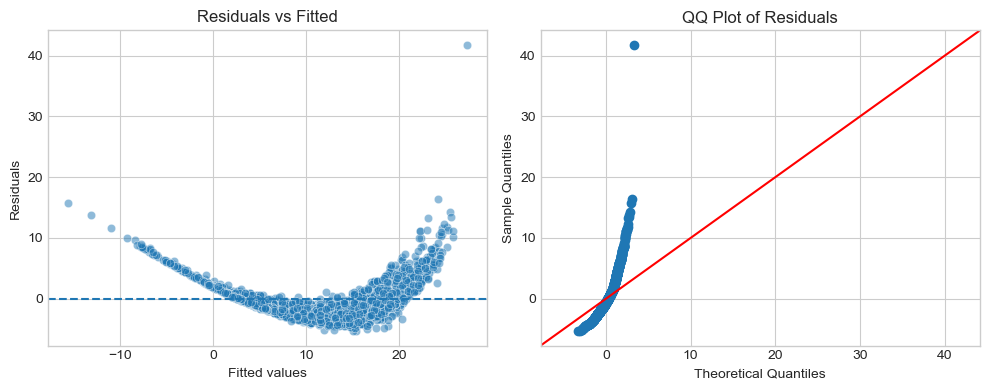

OLS Model Performance on Test Set
R² Score : 0.8747
RMSE     : 3.1628
MAE      : 2.2152


In [197]:
# Add constant
X_train_ols = sm.add_constant(x_train)

# Fit OLS
ols_model = sm.OLS(y_train, X_train_ols).fit(cov_type='HC3')

# Summary
print(ols_model.summary())

# Check for variance inflation
print('\n'+'=='*50)
print("Variance Inflation Factors:")
vif = pd.DataFrame()
vif["Variable"] = X_train_ols.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_ols.values, i)
    for i in range(X_train_ols.shape[1])
]

display(vif)

# Residuals and Fitted plots QQ plot analysis
print('\n'+'=='*50)
print("Residuals and QQ Plot Analysis:")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Residuals vs Fitted
sns.scatterplot(
    x=ols_model.fittedvalues,
    y=ols_model.resid,
    alpha=0.5,
    ax=axes[0]
)
axes[0].axhline(0, linestyle='--')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted")

# QQ Plot
sm.qqplot(
    ols_model.resid,
    line='45',
    ax=axes[1]
)
axes[1].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

# Evaluate on test holdout set
# Prepare test set
X_test_ols = sm.add_constant(x_test)

# Predictions
y_pred_ols = ols_model.predict(X_test_ols)

# Metrics
r2_ols = r2_score(y_test, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
mae_ols = mean_absolute_error(y_test, y_pred_ols) 

print("OLS Model Performance on Test Set")
print("==" * 30)
print(f"R² Score : {r2_ols:.4f}")
print(f"RMSE     : {rmse_ols:.4f}")
print(f"MAE      : {mae_ols:.4f}") 

### *Observation and Interpretation:*

#### 1. Overall Model Fit
- The model explains a **very large proportion of variation** in replacement ratio:  
  - **R² = 0.858 (train)**  
  - **R² = 0.8747 (test)**
- The slightly **higher test R²** indicates **good generalization** with **no clear overfitting**.
- **RMSE ≈ 3.16** suggests prediction errors are relatively small compared to the scale of the dependent variable.

**Interpretation:**  
The predictors collectively provide **strong explanatory and predictive power** for retirement income adequacy.

#### 2. Statistical Significance of Predictors
All predictors are **highly statistically significant (p < 0.001)**.

#### Direction and Meaning of Effects
- **Years to retirement (β = +6.10)**  
  - Strong **positive** effect.  
  - More time in the pension scheme substantially increases replacement ratio.  
  - This is the **most influential and policy-relevant driver**.

- **Total contribution rate (β = +0.77)** suggests higher contributions modestly increase retirement adequacy. This confirms the importance of **saving intensity**.

- **Log salary (β = −6.67)** shows a negative relationship. Higher earners tend to achieve **lower replacement ratios**, possibly because contributions do not scale proportionally with income and lifestyle expectations increase retirement needs.

- **Log fund value (β = +9.14)** has a strong **positive** effect meaning accumulated pension wealth is a **major determinant** of adequacy.

**Interpretation:**  
Retirement adequacy is primarily driven by **time in the scheme and accumulated savings**, rather than salary level alone.

#### 3. Diagnostic Analysis

#### Residuals vs Fitted Plot
- Presence of a **U-shaped curvature** in residuals.  
- Indicates **non-linearity** and potential **model misspecification**.  
- Suggests missing **polynomial terms or interactions**, meaning a purely linear structure may be restrictive.

#### QQ Plot of Residuals
- Strong deviation from the diagonal line.  
- Evidence of **right skewness and heavy tails**.

#### Statistical Tests
- **Jarque–Bera p = 0.00 → residuals are not normally distributed.**  
- **High skewness (2.52) and kurtosis (22.05)** confirm the presence of **extreme outliers**.  
- **Durbin–Watson ≈ 1.9 → no significant autocorrelation** detected.

**Interpretation:**  
Although predictive accuracy is strong, **OLS assumptions of normality and linearity are violated**.  
Robust standard errors (HC3) appropriately address heteroscedasticity, but **non-linear modeling approaches may improve structural validity**.

#### 4. Multicollinearity Check: All **VIF values are below 5**, indicating **no harmful multicollinearity**.

**Interpretation:**  
Coefficient estimates are **stable, interpretable, and statistically reliable**.

### 5. Key Insights
1. **Time to retirement is the strongest lever** for improving adequacy.  
2. **Increasing contribution rates** meaningfully improves retirement outcomes.  
3. **High salaries do not guarantee adequate retirement income**.  
4. **Accumulated pension wealth is critical** for financial security in retirement.  

## GAM ANALYSIS

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.5425
Link Function:                     IdentityLink Log Likelihood:                                 -5549.8354
Number of Samples:                         2276 AIC:                                            11190.7558
                                                AICc:                                           11192.6573
                                                GCV:                                                8.1199
                                                Scale:                                               2.799
                                                Pseudo R-Squared:                                   0.8931
Feature Function                  Lam

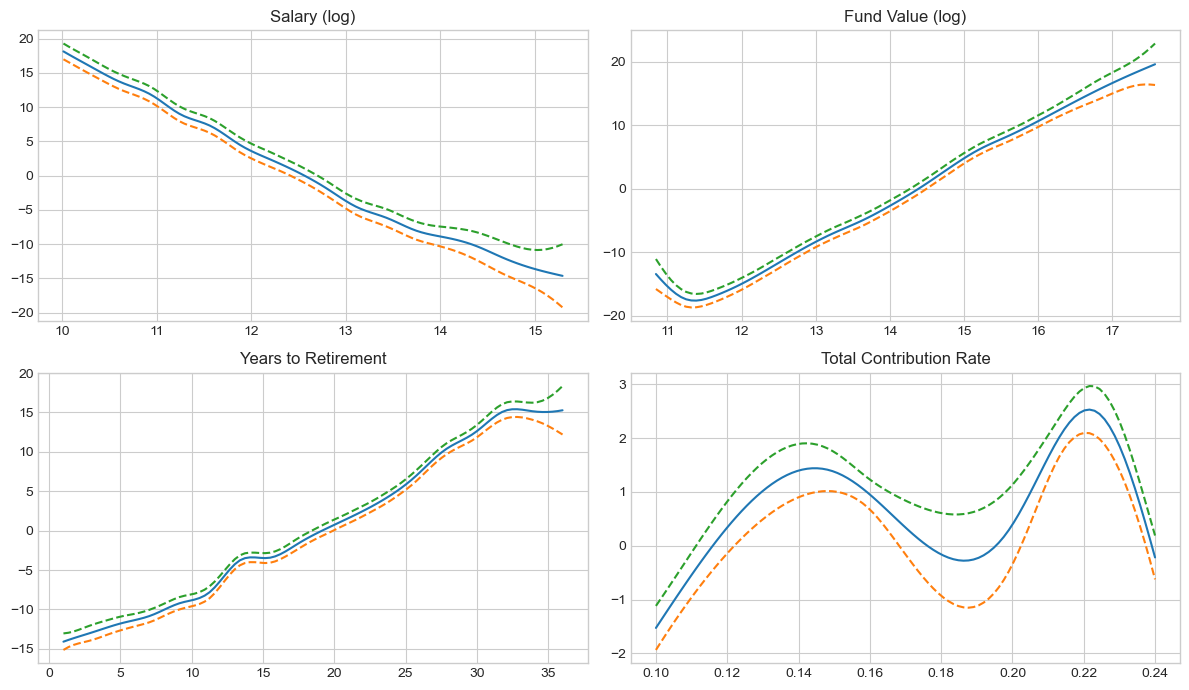

GAM Model Performance on Test Set
R² Score : 0.8931
RMSE     : 2.7715
MAE      : 1.8873


In [198]:
# GAMs should be fit on unscaled but transformed variables
# Thus we create a separate dataset for GAM fitting
X_gam = model_df.drop('rr', axis=1).copy()
y_gam = model_df['rr'].values

# Log transforms
X_gam['salary_log'] = np.log1p(X_gam['salary'])
X_gam['fund_value_log'] = np.log1p(X_gam['fund_value'])

X_gam = X_gam[[
    'salary_log',
    'fund_value_log',
    'years_to_retirement',
    'total_contribution_rate'
]].values

# Fit GAM model
gam = LinearGAM(
    s(0) +  # salary_log
    s(1) +  # fund_value_log
    s(2) +  # years_to_retirement
    s(3)    # total_contribution_rate
).fit(X_gam, y_gam)

print(gam.summary())

# Plot partial dependence for each feature
titles = [
    "Salary (log)",
    "Fund Value (log)",
    "Years to Retirement",
    "Total Contribution Rate"
]

# Make figure
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(
        XX[:, i],
        gam.partial_dependence(term=i, X=XX, width=0.95)[1],
        linestyle='--'
    )
    ax.set_title(titles[i])

plt.legend()
plt.tight_layout()
plt.show()

# Predictive comparison with OLS on test set
y_pred_gam = gam.predict(X_gam)

# Metrics
r2_gam = r2_score(y_gam, y_pred_gam)
rmse_gam = np.sqrt(mean_squared_error(y_gam, y_pred_gam))
mae_gam = mean_absolute_error(y_gam, y_pred_gam)  

print("GAM Model Performance on Test Set")
print("==" * 30)
print(f"R² Score : {r2_gam:.4f}")
print(f"RMSE     : {rmse_gam:.4f}")
print(f"MAE      : {mae_gam:.4f}")  

#### *Observations and Interpretation:*

The GAM results confirm and refine the OLS findings by demonstrating that the sensitivity of the replacement ratio to its key drivers is strongly nonlinear. Accumulated fund value and years to retirement exhibit pronounced diminishing returns, with marginal gains in RR flattening at higher levels of wealth and longer time horizons. This highlights the importance of early accumulation, as additional gains later in the lifecycle yield smaller improvements in adequacy.

The negative effect of salary on RR persists in the GAM framework but varies across the income distribution, indicating that the denominator effect intensifies at higher earnings levels. This suggests that proportional increases in salary do not translate into proportional improvements in retirement adequacy unless accompanied by commensurate increases in accumulated assets.

The contribution rate shows a positive but comparatively modest and near-linear relationship with RR, reinforcing the view that contribution intensity alone is insufficient to offset shorter accumulation periods or low starting balances.

Overall, the GAM analysis demonstrates that while linear models capture the dominant direction of RR drivers, they mask important nonlinear patterns that are critical for understanding lifecycle dynamics and for designing effective retirement policy interventions. The GAM therefore provides a more nuanced sensitivity benchmark, bridging the gap between the fully parametric OLS model and more flexible machine learning approaches.

## RANDOM FOREST REGRESSION ANALYSIS

Random Forest Model Performance on Test Set
R² Score : 0.9534
RMSE     : 1.9279
MAE      : 0.9922


salary_log                 0.099573
total_contribution_rate    0.123767
fund_value_log             0.170919
years_to_retirement        0.605741
dtype: float64

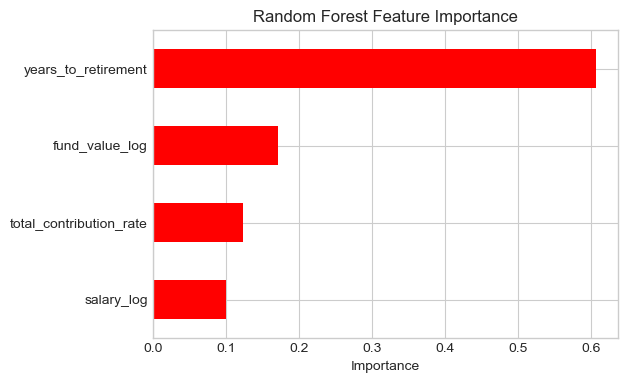

In [199]:
# Initialize RF
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Fit
rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)

# Metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf) 

print("Random Forest Model Performance on Test Set")
print("==" * 30)
print(f"R² Score : {r2_rf:.4f}")
print(f"RMSE     : {rmse_rf:.4f}")
print(f"MAE      : {mae_rf:.4f}") 

# Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
display(feat_importances)

# Plot
feat_importances.plot(kind='barh', figsize=(6,4), color='red')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()

## XGBOOST REGRESSION ANALYSIS

XGBoost Model Performance on Test Set
R² Score : 0.9766
RMSE     : 1.3672
MAE      : 0.7431


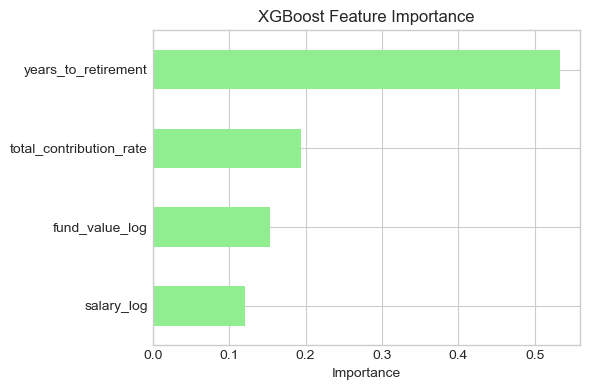

In [200]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  

print("XGBoost Model Performance on Test Set")
print("==" * 30)
print(f"R² Score : {r2_xgb:.4f}")
print(f"RMSE     : {rmse_xgb:.4f}")
print(f"MAE      : {mae_xgb:.4f}") 

# Feature Importance
feat_importances = pd.Series(xgb_model.feature_importances_, index=x_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)

feat_importances.plot(kind='barh', figsize=(6,4), color='lightgreen')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

#### *Observation and Interpretation from both Random Forest and XGBoost:*

The Random Forest and XGBoost models both demonstrate strong predictive performance, substantially outperforming the linear OLS model. Random Forest achieves an R² of 0.953, RMSE of 1.93, and MAE of 0.99, while XGBoost further improves accuracy with an R² of 0.977, RMSE of 1.37, and MAE of 0.74. 

These results indicate that both models capture complex nonlinear relationships and interactions among predictors. Feature importance analysis confirms that years to retirement is the dominant driver of replacement ratio outcomes (61% in Random Forest, 53% in XGBoost), followed by accumulated fund value, total contribution rate, and salary, which has the smallest impact. 

Overall, the models reinforce that replacement ratio is primarily determined by time in the pension scheme and accumulated savings, while contribution rate and salary play smaller but meaningful roles. 

XGBoost provides the highest predictive accuracy, making it a reliable benchmark for replacement ratio forecasting.

### In summary:

Across all modeling approaches, the analysis consistently identifies years to retirement and accumulated pension wealth as the primary determinants of replacement ratio, while contribution rate and salary have smaller but meaningful effects. 

The linear OLS model explains a large portion of the variation, with R² values of 0.858 on the training set and 0.875 on the test set, and an RMSE of 3.16, indicating reasonably accurate predictions. However, diagnostic checks reveal nonlinearity in the relationships and non-normality of residuals, suggesting that purely linear models may not fully capture the underlying dynamics. 

The generalized additive model (GAM) improves upon OLS by accounting for nonlinearities, achieving a pseudo R² of 0.893 and highlighting substantial curvature in the effects of salary, fund value, and years to retirement, while contribution rate remains relatively linear. 

Tree-based models provide the strongest predictive performance. Random Forest attains an R² of 0.953, RMSE of 1.93, and MAE of 0.99, while XGBoost further improves accuracy with an R² of 0.977, RMSE of 1.37, and MAE of 0.74. 

Feature importance from both tree-based models confirms that years to retirement is the dominant driver (61% in Random Forest, 53% in XGBoost), followed by accumulated fund value, total contribution rate, and salary, which has the smallest impact. 

Overall, these results indicate that while linear models provide interpretable estimates and highlight general trends, nonlinear approaches like GAM and tree-based models capture the complex relationships more effectively, with XGBoost providing the highest predictive accuracy and serving as a benchmark for understanding the key drivers of retirement adequacy.

### SAVE BEST MODEL FOR DEPLOYMENT

In [201]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "xgb_rr_model.pkl")
print("Model Saved!")

# Save scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler Saved!")

Model Saved!
Scaler Saved!
